In [1]:
from main import read_file, quick_peep
from amtc.usage import amtc_freq_from_signal, amtc_freq_from_spectrogram
from utils import *
import matplotlib.pyplot as plt

### Get Breathing Rate from a sample video file

In [2]:
video_id = 'dog003'

signal_collection_folder = "outputs/"

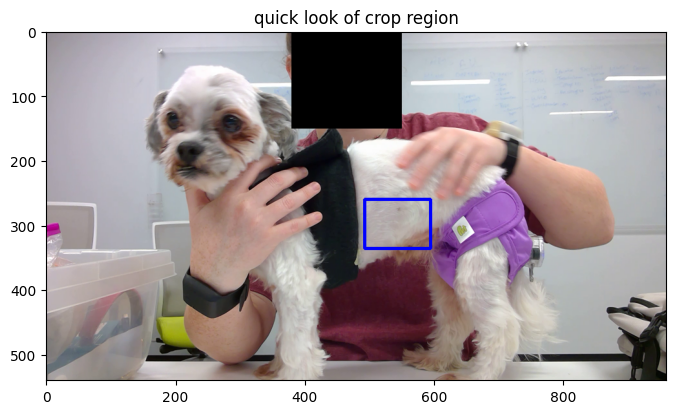

In [3]:
%matplotlib inline

# loading the visual displacement signal recorded earlier
sig, info = read_file(video_id, 0, signal_collection_folder, 'displacement_')
quick_peep(info)

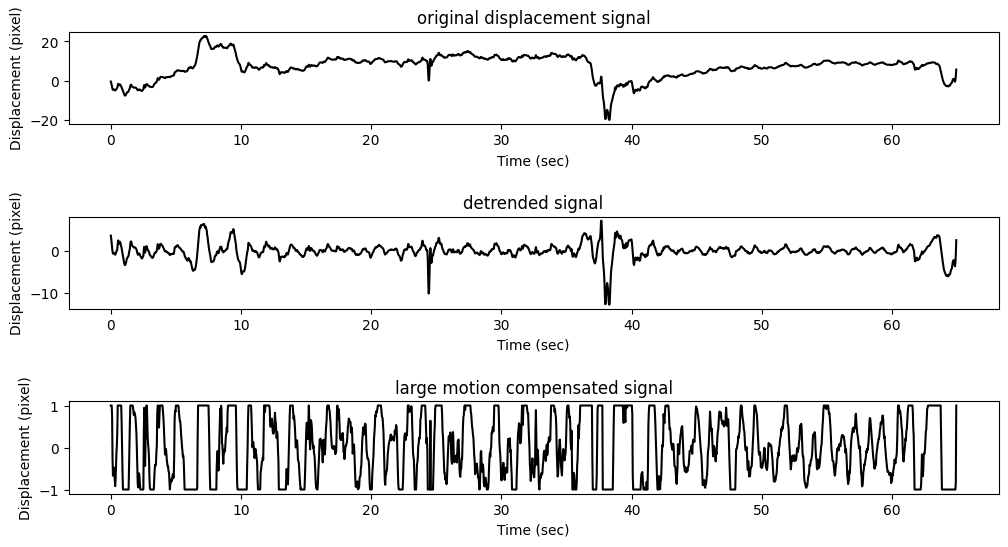

In [3]:
sig, info = read_file(video_id, 0, signal_collection_folder, 'displacement_')
sig_v = sig[:, 1]  # optical flow through y direction

n_samples = sig_v.shape[0]
time = np.linspace(0, n_samples / 30, n_samples)
t, sig_detrended = detrend(time, sig_v, w=61, preserve_length=True)
sig_clipped = np.clip(sig_detrended, -1, 1)

plot_signals2([sig_v, sig_detrended, sig_clipped],
              '',
              [
                  'original displacement signal',
                  'detrended signal',
                  'large motion compensated signal'
              ],
              ylabel='Displacement (pixel)')

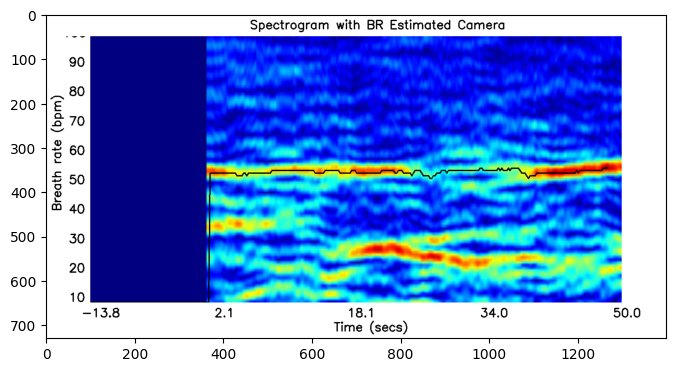

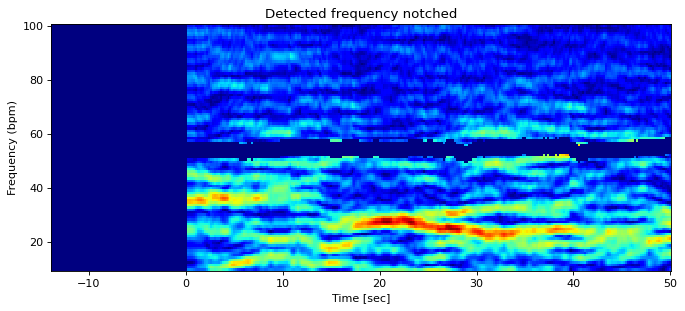

In [7]:
spec_rgb, rec_time, rec_est, spectrogram2, spec_time, spec_freq = amtc_freq_from_signal(sig_v, info["fps"], [10,100],  window_length_in_sec=15,
                                                                              nfft=2048, smoothness=1.05, notch_switch=True, notch_in_nbins=3, overlap=0.98, label="BR", preprocess_k=1)
plt.figure(figsize=(8, 6), dpi=100)
plt.imshow(spec_rgb)

plot_spectrogram(spectrogram2, spec_time, spec_freq, "Detected frequency notched")

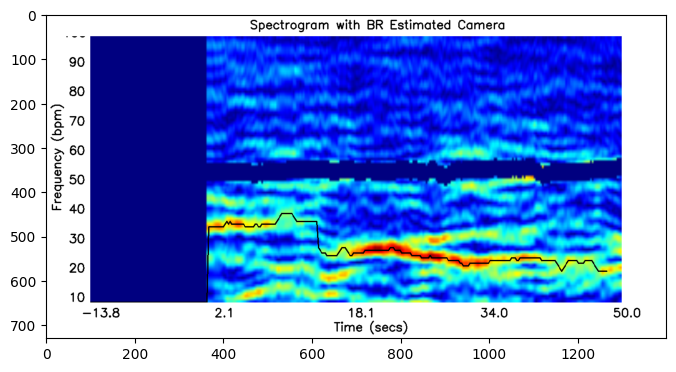

In [8]:
spec_res, rec_time, rec_est, _ = amtc_freq_from_spectrogram(spectrogram2, spec_time, spec_freq, delay=0, notch_switch=False, smoothness=1.05)

plt.figure(figsize=(8, 6), dpi=100)
plt.imshow(spec_res)

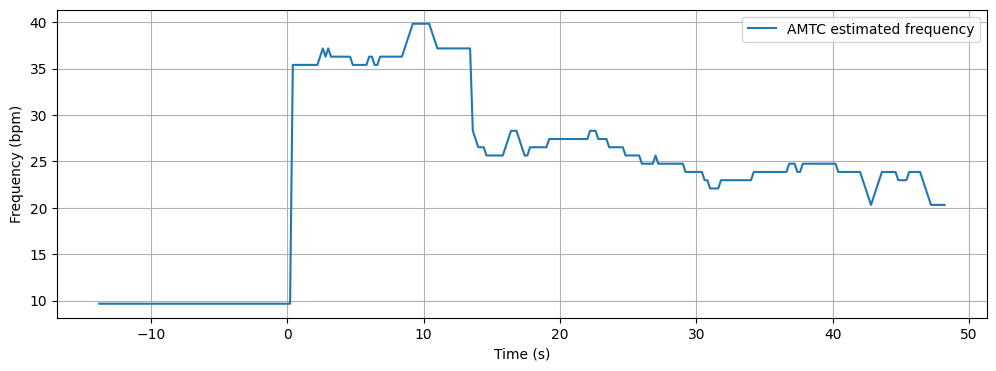

In [9]:
plot_time_vs_freq(rec_time, rec_est)